In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
salary = pd.read_csv('Salary_Data.csv')

In [3]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA 

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
#checking for null values
print(salary.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [8]:
#checking for duplicated values
print(salary.duplicated().sum())

0


In [9]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Graphical Representation of Values

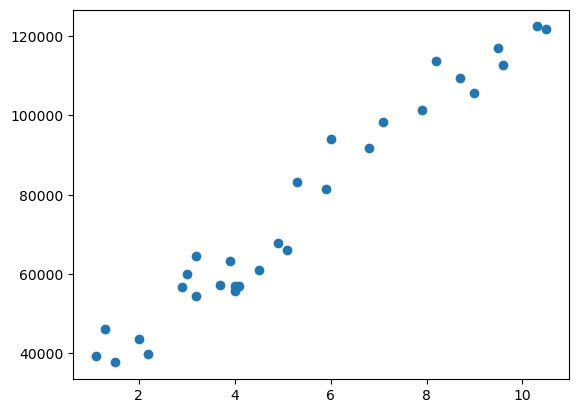

In [10]:
#plotting the graph of data to check for data discrepancies
plt.scatter(salary['YearsExperience'], salary['Salary'])

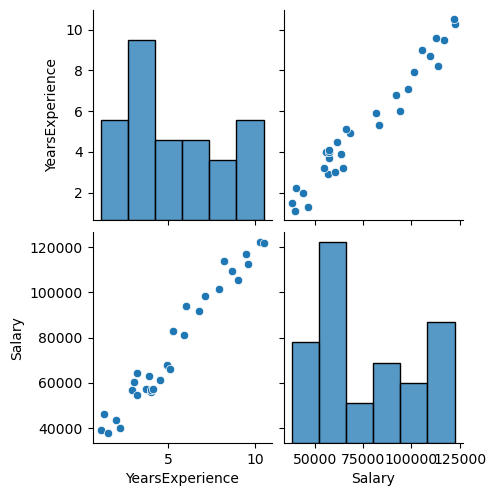

In [11]:
sns.pairplot(salary)

/var/folders/p9/2nv9vy095r9bfc4bq1ldqx100000gn/T/ipykernel_38566/708293685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<AxesSubplot: xlabel='Salary', ylabel='Density'>

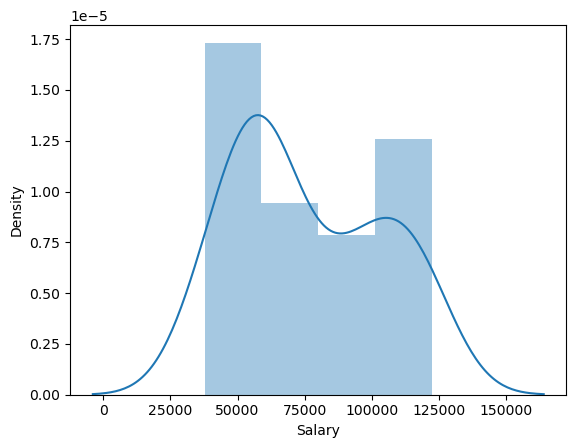

In [12]:
sns.distplot(salary['Salary'])

/var/folders/p9/2nv9vy095r9bfc4bq1ldqx100000gn/T/ipykernel_38566/2240156110.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

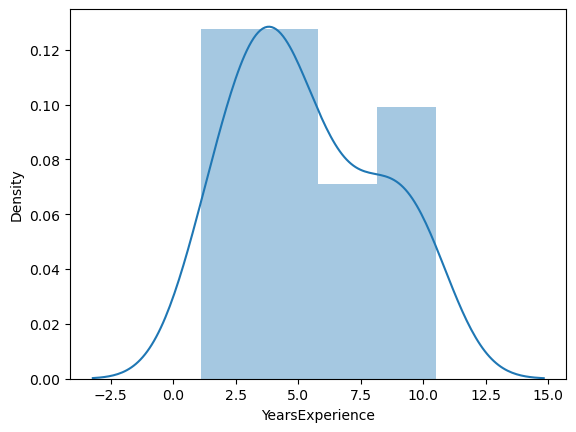

In [13]:
sns.distplot(salary['YearsExperience'])

## Regression Model Graph 


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

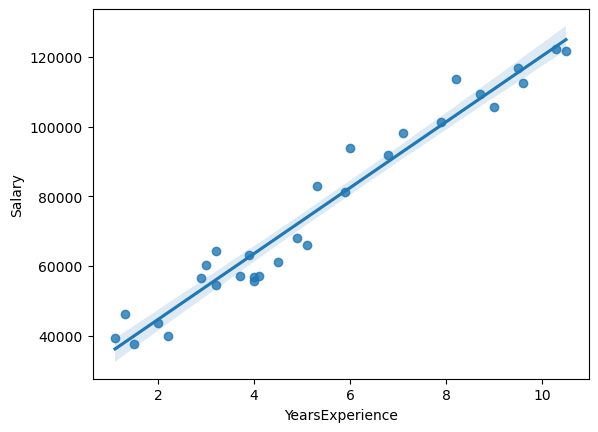

In [14]:
sns.regplot(x='YearsExperience',y='Salary', data = salary)

## Model Building

In [15]:
model = smf.ols('Salary~YearsExperience', data = salary).fit()

## Model Accuracy Testing

In [16]:
#coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
#tvalues and pvalues of the models
print('The tvalues of the model are:\n{} \n\nThe pvalues of the model are are: \n{}'.format(model.tvalues, model.pvalues))


The tvalues of the model are:
Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

The pvalues of the model are are: 
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
#Rsquared and Adjusted Rsquared values for the model 

print('The Rsquared value of the model is:\n{} \n\nThe Adjusted Rsquared value of the model is \n{}'.format(model.rsquared, model.rsquared_adj))



The Rsquared value of the model is:
0.9569566641435086 

The Adjusted Rsquared value of the model is 
0.9554194021486339


## Prediction of Salary based of Years of Experience

In [19]:
#lets create a sample dataframe of values 30,32.5,46,56.5 to see how our model predicts data
data = pd.Series([30,32.5,46,56.5], name='YearsExperience')
sample = pd.DataFrame(data,columns=['YearsExperience'])
sample

,YearsExperience
0,30.0
1,32.5
2,46.0
3,56.5


In [20]:
#now lets predict the delivery time using our model
predict = model.predict(sample)
predict

0    309291.069842
1    332915.975646
2    460490.466986
3    559715.071361
dtype: float64